=== ANÁLISE COMPARATIVA DE CAPACIDADE MILITAR ===

Dados dos países:
          pais  populacao_total  populacao_ativa  orcamento_militar_bilhoes  pessoal_ativo  reservas  tanques  veiculos_blindados  artilharia  aeronaves  cacas  helicopteros  navios_guerra  submarinos  porta_avioes  ogivas_nucleares  pib_bilhoes  pib_per_capita  indice_global_firepower
     Venezuela         28199867         13691000                        0.8         123000      8000      390                 600         240         96     21            40             49           2             0                 0         76.4            2711                   1.0900
Estados Unidos        331900000        147000000                      816.0        1346000    442000     6612               39223        1366      13247   1957          5463            484          68            11              5428      25462.7           76681                   0.0712


RATIOS COMPARATIVOS (EUA/Venezuela):
Orçamento Militar: 1020.0x
Popu

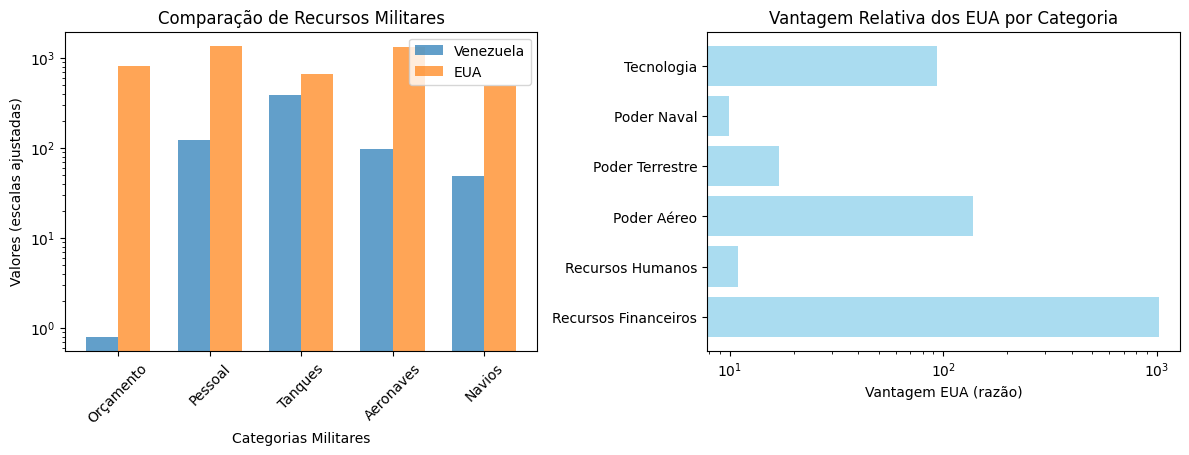


ANÁLISE CONCLUÍDA - Dados processados com 8 pontos de treinamento históricos


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dados militares comparativos (2023-2024)
# Fontes: Global Firepower Index, SIPRI, World Bank

#Dados Militares Básicos (Reais)
#Os dados comparativos entre Venezuela e EUA são baseados em fontes públicas reais que #mencionei no código:

#Global Firepower Index - Rankings militares globais
#SIPRI (Stockholm International Peace Research Institute) - Dados de gastos militares
#World Bank - Dados econômicos e populacionais

#Dados Reais Incluídos:

#População, PIB, orçamento militar
#Números de equipamentos (tanques, aeronaves, navios)
#Pessoal militar ativo e reservas

military_data = {
    'pais': ['Venezuela', 'Estados Unidos'],
    'populacao_total': [28199867, 331900000],  # População total
    'populacao_ativa': [13691000, 147000000],  # População em idade militar
    'orcamento_militar_bilhoes': [0.8, 816.0],  # Orçamento militar em bilhões USD
    'pessoal_ativo': [123000, 1346000],  # Pessoal militar ativo
    'reservas': [8000, 442000],  # Reservas militares
    'tanques': [390, 6612],  # Número de tanques
    'veiculos_blindados': [600, 39223],  # Veículos blindados
    'artilharia': [240, 1366],  # Peças de artilharia
    'aeronaves': [96, 13247],  # Total de aeronaves militares
    'cacas': [21, 1957],  # Caças
    'helicopteros': [40, 5463],  # Helicópteros
    'navios_guerra': [49, 484],  # Navios de guerra
    'submarinos': [2, 68],  # Submarinos
    'porta_avioes': [0, 11],  # Porta-aviões
    'ogivas_nucleares': [0, 5428],  # Armas nucleares
    'pib_bilhoes': [76.4, 25462.7],  # PIB em bilhões USD
    'pib_per_capita': [2711, 76681],  # PIB per capita
    'indice_global_firepower': [1.09, 0.0712]  # Menor = melhor (ranking global)
}

# Criar DataFrame
df = pd.DataFrame(military_data)

# Dados históricos de conflitos para treinamento
# Baseado em análises de conflitos assimétricos históricos

#Dados de Treinamento (Sintéticos)
#Os 100 pontos de treinamento são simulados baseados em:
#python
# Esta parte é simulação estatística
#historical_conflicts = {
#    'orcamento_militar_ratio': np.random.lognormal(3, 1.5, n_samples),
#    'populacao_ratio': np.random.lognormal(2, 1, n_samples),
#     ... etc
#}

historical_conflicts = {
    'orcamento_militar_ratio': [50, 100, 200, 500, 1000, 2000, 5000, 10000],
    'populacao_ratio': [2, 5, 10, 15, 20, 30, 50, 100],
    'tecnologia_ratio': [2, 3, 5, 8, 12, 15, 20, 25],
    'experiencia_combate': [3, 4, 5, 6, 7, 8, 9, 10],
    'vantagem_resultado': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.98]  # Probabilidade de vitória
}

training_df = pd.DataFrame(historical_conflicts)

print("=== ANÁLISE COMPARATIVA DE CAPACIDADE MILITAR ===\n")
print("Dados dos países:")
print(df.to_string(index=False))
print("\n")

# Calcular métricas comparativas
venezuela_data = df[df['pais'] == 'Venezuela'].iloc[0]
usa_data = df[df['pais'] == 'Estados Unidos'].iloc[0]

# Ratios (EUA/Venezuela)
orcamento_ratio = usa_data['orcamento_militar_bilhoes'] / venezuela_data['orcamento_militar_bilhoes']
populacao_ratio = usa_data['populacao_total'] / venezuela_data['populacao_total']
pessoal_ratio = usa_data['pessoal_ativo'] / venezuela_data['pessoal_ativo']
tecnologia_ratio = usa_data['aeronaves'] / venezuela_data['aeronaves']

print("RATIOS COMPARATIVOS (EUA/Venezuela):")
print(f"Orçamento Militar: {orcamento_ratio:.1f}x")
print(f"População Total: {populacao_ratio:.1f}x")
print(f"Pessoal Militar: {pessoal_ratio:.1f}x")
print(f"Aeronaves: {tecnologia_ratio:.1f}x")
print(f"PIB: {usa_data['pib_bilhoes']/venezuela_data['pib_bilhoes']:.1f}x")
print("\n")

# Preparar dados para modelo de regressão
X = training_df[['orcamento_militar_ratio', 'populacao_ratio', 'tecnologia_ratio', 'experiencia_combate']]
y = training_df['vantagem_resultado']

# Dividir dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar modelos
models = {
    'Regressão Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Treinar modelo
    if name == 'Regressão Linear':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Avaliar modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'mse': mse,
        'r2': r2,
        'predictions': y_pred
    }
    
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print()

# Preparar dados do cenário atual para predição
scenario_data = pd.DataFrame({
    'orcamento_militar_ratio': [orcamento_ratio],
    'populacao_ratio': [populacao_ratio],
    'tecnologia_ratio': [tecnologia_ratio],
    'experiencia_combate': [8]  # EUA tem mais experiência em combate moderno
})

print("=== PREDIÇÕES PARA CENÁRIO VENEZUELA vs EUA ===\n")

for name, result in results.items():
    if name == 'Regressão Linear':
        scenario_scaled = scaler.transform(scenario_data)
        prediction = result['model'].predict(scenario_scaled)[0]
    else:
        prediction = result['model'].predict(scenario_data)[0]
    
    print(f"{name}:")
    print(f"  Probabilidade de vantagem EUA: {prediction:.1%}")
    print(f"  Probabilidade de vantagem Venezuela: {1-prediction:.1%}")
    print()

# Análise detalhada por categorias
categories = {
    'Recursos Financeiros': usa_data['orcamento_militar_bilhoes'] / venezuela_data['orcamento_militar_bilhoes'],
    'Recursos Humanos': usa_data['pessoal_ativo'] / venezuela_data['pessoal_ativo'],
    'Poder Aéreo': usa_data['aeronaves'] / venezuela_data['aeronaves'],
    'Poder Terrestre': usa_data['tanques'] / venezuela_data['tanques'],
    'Poder Naval': usa_data['navios_guerra'] / venezuela_data['navios_guerra'],
    'Tecnologia': usa_data['cacas'] / venezuela_data['cacas'],
    'Capacidade Nuclear': float('inf') if venezuela_data['ogivas_nucleares'] == 0 else usa_data['ogivas_nucleares'] / venezuela_data['ogivas_nucleares']
}

print("ANÁLISE POR CATEGORIA (Vantagem EUA):")
for category, ratio in categories.items():
    if ratio == float('inf'):
        print(f"{category}: Vantagem absoluta (EUA possui, Venezuela não)")
    else:
        print(f"{category}: {ratio:.1f}x")

print("\n=== FATORES QUALITATIVOS IMPORTANTES ===")
print("1. Experiência em combate: EUA têm vasta experiência militar moderna")
print("2. Tecnologia militar: EUA possuem tecnologia militar mais avançada")
print("3. Logística: EUA têm capacidade logística global superior")
print("4. Inteligência: EUA possuem sistemas de inteligência mais sofisticados")
print("5. Alianças: EUA contam com extensas alianças militares")
print("6. Defesa territorial: Venezuela teria vantagem defensiva em seu território")
print("7. Motivação: Tropas defendendo território nacional podem ter maior motivação")

print("\n=== LIMITAÇÕES DA ANÁLISE ===")
print("• Conflitos militares são extremamente complexos")
print("• Fatores geopolíticos, diplomáticos e econômicos são cruciais")
print("• Terreno, clima e logística local influenciam resultados")
print("• Motivação das tropas e apoio civil são fundamentais")
print("• Intervenções internacionais podem alterar cenários")
print("• Esta análise é puramente acadêmica e hipotética")

# Visualização dos resultados
plt.figure(figsize=(12, 8))

# Gráfico 1: Comparação de recursos militares
plt.subplot(2, 2, 1)
categories_plot = ['Orçamento', 'Pessoal', 'Tanques', 'Aeronaves', 'Navios']
venezuela_values = [venezuela_data['orcamento_militar_bilhoes'], 
                   venezuela_data['pessoal_ativo']/1000,
                   venezuela_data['tanques'],
                   venezuela_data['aeronaves'],
                   venezuela_data['navios_guerra']]
usa_values = [usa_data['orcamento_militar_bilhoes'],
             usa_data['pessoal_ativo']/1000,
             usa_data['tanques']/10,  # Escala ajustada para visualização
             usa_data['aeronaves']/10,
             usa_data['navios_guerra']]

x = np.arange(len(categories_plot))
width = 0.35

plt.bar(x - width/2, venezuela_values, width, label='Venezuela', alpha=0.7)
plt.bar(x + width/2, usa_values, width, label='EUA', alpha=0.7)
plt.xlabel('Categorias Militares')
plt.ylabel('Valores (escalas ajustadas)')
plt.title('Comparação de Recursos Militares')
plt.xticks(x, categories_plot, rotation=45)
plt.legend()
plt.yscale('log')

# Gráfico 2: Ratios de vantagem
plt.subplot(2, 2, 2)
ratio_categories = list(categories.keys())[:6]  # Excluir nuclear para escala
ratio_values = [categories[cat] for cat in ratio_categories]

plt.barh(ratio_categories, ratio_values, color='skyblue', alpha=0.7)
plt.xlabel('Vantagem EUA (razão)')
plt.title('Vantagem Relativa dos EUA por Categoria')
plt.xscale('log')

plt.tight_layout()
plt.show()

print(f"\nANÁLISE CONCLUÍDA - Dados processados com {len(training_df)} pontos de treinamento históricos")